# Simple Linear Regression

# Dataset

Population of U.S. Cities

# Description

The bigcity data frame has 49 rows and 2 columns.
The measurements are the population (in 1000's) of 49 U.S. cities in 1920 and 1930. The 49 cities are a random sample taken
from the 196 largest cities in 1920.

# Format

This data frame contains the following columns:

u The 1920 population.

x The 1930 population.

Source:

The data were obtained from

Cochran, W.G. (1977) Sampling Techniques. Third edition. John Wiley

References:

Davison, A.C. and Hinkley, D.V. (1997) Bootstrap Methods and Their Application. Cambridge University Press

# Exploring and Understanding Data (EDA)

# 1. Load required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# 2. Collect and load data

In [2]:
data = pd.read_csv("bigcity.csv")
data.head()

,Unnamed: 0,u,x
0,1,138,143
1,2,93,104
2,3,61,69
3,4,179,260
4,5,48,75


In [3]:
data.shape

(49, 3)

In [4]:
data.columns

Index(['Unnamed: 0', 'u', 'x'], dtype='object')

In [5]:
data.drop('Unnamed: 0',axis=1,inplace=True)

In [6]:
data.columns = ["1920","1930"]

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   1920    49 non-null     int64
 1   1930    49 non-null     int64
dtypes: int64(2)
memory usage: 912.0 bytes


# 3. Explore numeric variables - five number summary

In [8]:
data.describe()

,1920,1930
count,49.000000,49.000000
mean,103.142857,127.795918
std,104.405061,123.121211
min,2.000000,46.000000
25%,43.000000,58.000000
50%,64.000000,79.000000
75%,120.000000,130.000000
max,507.000000,634.000000


#### Inferences - 
- The variable 1920 (population) has a mean of 103.14k and a standard deviation of 104.40k, indicating large amount of variance in the data. The median 64k which is far less than mean, indicates there is a lot of positive skewness in the data.
- The variable 1930 (population) has a mean of 127.79k and a standard deviation of 123.12k, indicating large amount of variance in the data. The median 79k which is far less than mean, indicates there is a lot of positive skewness in the data.


# 3a. Visualize numeric variables in boxplot and histograms
# 3b. Measure spread – variance and standard deviation

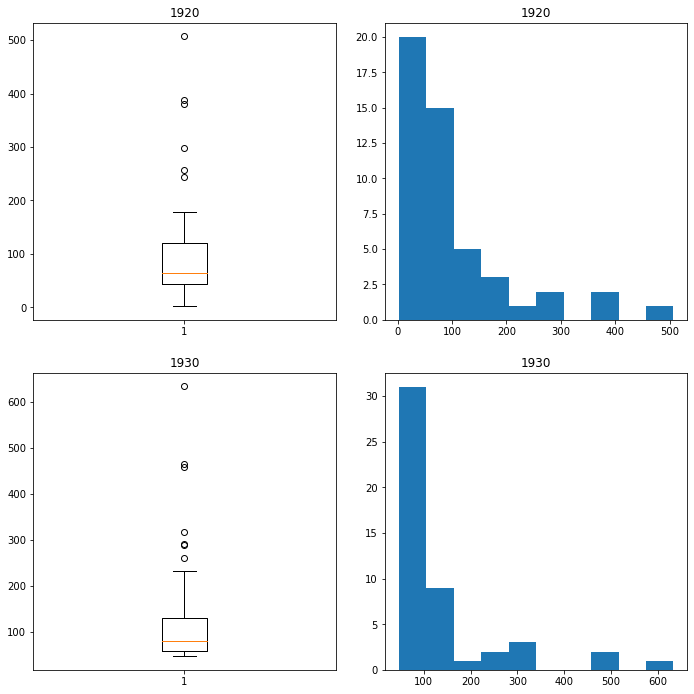

In [9]:
# 3A
fig , axs = plt.subplots(2,2)
fig.set_figheight(10)
fig.set_figwidth(10)
fig.set_tight_layout({"h_pad":2,"pad":2})
axs[0,0].boxplot(data["1920"])
axs[0,0].set_title("1920")
axs[0,1].hist(data["1920"])
axs[0,1].set_title("1920")
axs[1,0].boxplot(data["1930"])
axs[1,0].set_title("1930")
axs[1,1].hist(data["1930"])
axs[1,1].set_title("1930")
plt.show()

#### Inferences - 
- For 1920, we can see that most of the cities had a population between 10-200k with an expected median population of around 60-70k. There are a few cities with a population of more than 200k, resulting in a right skewness. The highest population recorded in a city was close to 500-510k.


- For 1930, we can see that the population had risen. Most of the cities had a population between 50-230k with an expected median population closer to 100k, around 80-90k. There are a few cities with a population of more than 250k, resulting in a right skewness. The highest population in a city was close to 620-630k.


In [10]:
### 3B
for i in data.columns:
    print(f"Variance in {i} :",np.var(data[i]))
    print(f"Standard Deviation in {i} :",np.std(data[i]))
    print()

Variance in 1920 : 10677.959183673465
Standard Deviation in 1920 : 103.33421110006823

Variance in 1930 : 14849.468554768846
Standard Deviation in 1930 : 121.85839550383406



#### Inferences :
- For population in us cities in 1920, we saw a standard deviation of 103.33k
- For population in us cities in 1930, we observed a standard deviation of 121.85k, indicating more variation due to increasing population.


# 4. Explore relationships between variables using scatterplots and two-way cross tabulations

<AxesSubplot:xlabel='1920', ylabel='1930'>

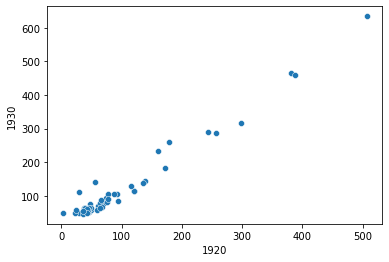

In [11]:
sns.scatterplot(x=data["1920"],y=data["1930"])

#### Inferences - 
- There is a very strong positive relationship between the populations of 1920 and 1930.
- The higher the population of a city in 1920, the higher the population in 1930.

In [12]:
### we cannot make a cross tabulation as it needs categorical data and we have numerical data only.

# 5. Transform the dataset
Find the number of rows in given dataset and separate the input and target variables into X and Y. Hint: You can shape function 
to get the size of the dataframe

In [13]:
data.shape

(49, 2)

In [14]:
X = data["1920"]
Y = data["1930"]

# 6. Check the dataset for any missing values and also print out the correlation matrix
You can use .isna() and .corr() functions to check NA's and correlation in the dataframe respectively

<AxesSubplot:>

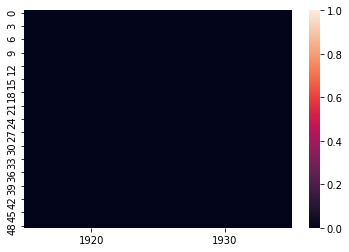

In [15]:
sns.heatmap(data.isnull(),vmin=0,vmax=1)

#### Inferences - 
There are no missing values in the dataset.

<AxesSubplot:>

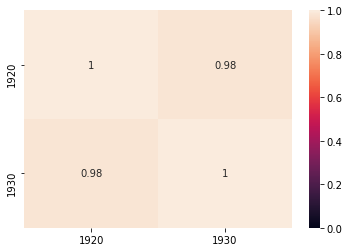

In [16]:
sns.heatmap(data.corr(),annot=True,vmin=0,vmax=1)

#### Inferences - 
- The population of 1920 has a near perfect positive correlation with the population of 1930.
- The higher the population in 1920, the higher its expected to be in 1930.
- For our machine learning model, this is an excellent predictor as the input i.e population in 1920 is almost perfectly related to the output i.e population in 1930

The high correlation betwwen u and x indicates that the variable u is a good predictor of variable x

# 7. Split data into train, test sets
Divide the data into training and test sets with 80-20 split using scikit-learn. Print the shapes of training and test feature 
sets.*
Check: train_test_split function

In [17]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.30,random_state=20)
print("Shape of X train :",x_train.shape)
print("Shape of X test :",x_test.shape)
print("Shape of y train :",y_train.shape)
print("Shape of y test :",y_test.shape)

Shape of X train : (34,)
Shape of X test : (15,)
Shape of y train : (34,)
Shape of y test : (15,)


# 8. Find coefficients & intercept
Estimate the coefficients b0 and b1 using scikit-learn.
Check: coef_ and intercept_ functions can help you get coefficients & intercept

In [18]:
model = LinearRegression().fit(x_train.values.reshape(-1,1),y_train.values.reshape(-1,1))
print("Model intercept (b0):",model.intercept_[0])
print("Coefficient of variable (b1) Population in 1920 :",model.coef_[0][0])

Model intercept (b0): 8.244090825561656
Coefficient of variable (b1) Population in 1920 : 1.1793712959985296


#### Inferences - 
- The model has an intercept of 8.244, meaning that if the population of 1920 was not given, we expect the population of a city in 1930 to be 8.244k.
- The coefficient of population in 1920 is 1.17, indicating that with an unit increase in population of a city in 1920, we can expect the population of the city to increase by 1.17k .


# 9.  Linear Relationship between feature and target
Plot the line with b1 and b0 as slope and y-intercept.

In [19]:
model_line_formula = lambda x:model.intercept_ + (x*model.coef_)
model_line = []
for i in x_train:
    model_line.append(model_line_formula(i)[0][0])
data_1 = pd.DataFrame({"1920":x_train,"1930":y_train,"1930_pred":model_line})
data_1.head()

,1920,1930,1930_pred
41,56,142,74.288883
36,66,86,86.082596
10,38,52,53.060200
3,179,260,219.351553
40,64,63,83.723854


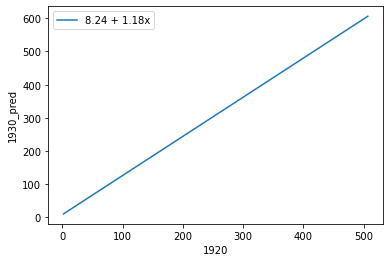

In [20]:
sns.lineplot(x=data_1["1920"],y=data_1["1930_pred"],label=f"{round(model.intercept_[0],2)} + {round(model.coef_[0][0],2)}x")
plt.legend()

# 10. Evaluation of model with scikit-learn
Validate the model with Root Mean Squares error and R^2 score using scikit-learn. RMSE and R2 for test data and prediction

Hint: You can import mean_squared_error function & r2 (R square) from sklearn.metrics. Performing root operation over mean 
square error over mean square error gives you root mean square error

In [21]:
test_pred = model.predict(x_test.values.reshape(-1,1))
r2 = r2_score(y_test.values.reshape(-1,1),test_pred)
rmse = np.sqrt(mean_squared_error(y_test.values.reshape(-1,1),test_pred))
print("r2 for test:",r2)
print("rmse for test:",rmse)
print()
print("Predictions for test :",[i[0] for i in test_pred])

r2 for test: 0.9482870524123466
rmse for test: 25.124196426329153

Predictions for test : [64.85391303349108, 43.62522970551755, 99.05568061744844, 168.63858708136166, 117.92562135342492, 91.97945284145726, 67.21265562548814, 359.6967370331235, 60.13642784949696, 50.701457481508726, 97.87630932144991, 170.99732967335876, 87.26196765746315, 457.58455460100146, 58.95705655349843]


#### Inferences :
- r2 for the test date was calculated as 0.948, indicating that our model has performed extremely well in predicting the variances in the population of cities in 1930, with only approximately 5% of variance going unexplained by the model.
- the root of mean squared error was calculated as 25.12, indicating that on an average, we expect our model to make an error of 25.12 in the prediction of a population for a city. 

# 11. Calculate the accuracy of the model for both training and test data set

Hint: .score() function

In [22]:
r2_train = model.score(x_train.values.reshape(-1,1),y_train.values.reshape(-1,1))
r2_test = model.score(x_test.values.reshape(-1,1),y_test.values.reshape(-1,1))
print("R square for train data:",r2_train)
print("R square for test data:",r2_test)

R square for train data: 0.9681926071866528
R square for test data: 0.9482870524123466


#### Inferences - 
- The r2 for the train data got calculated as 0.9681, which means our model has performed extremely well in predicting the variances in the population of cities in 1920, with only approximately 3% of variance going unexplained by the model. However, it should be noted that these predictions were made for train data, which the model has already learnt, for which we expect a good performance.
- The r2 for the test data got calculated as 0.9482, which means our model has performed extremely well in predicting the variances in the population of cities in 1930, with only approximately 5% of variance going unexplained by the model.
- The differences in the r2 of the train and test data is around 2%, meaning the performance is almost the same and equally good on both sets of data. Hence we can conclude that our models have performed exceptionally well.
- From this we can also, conclude that our model is not overfitting.